# word2Vec 실습

# 영어

In [1]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bsmon\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [1]:
import urllib.request
import zipfile
from lxml import etree
import re
from nltk.tokenize import word_tokenize, sent_tokenize

In [2]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/GaoleMeng/RNN-and-FFNN-textClassification/master/ted_en-20160408.xml", filename="ted_en-20160408.xml")

('ted_en-20160408.xml', <http.client.HTTPMessage at 0x210782fb790>)

In [7]:
targetXML = open("ted_en-20160408.xml",'r',encoding='UTF8')
target_text = etree.parse(targetXML)

parse_text = '\n'.join(target_text.xpath('//content/text()'))

content_text = re.sub(r'\([^)]*\)','',parse_text)#괄호안의 내용 제거

sent_text = sent_tokenize(content_text)

normalized_text = []
for string in sent_text:
    tokens = re.sub(r"[^a-z0-0]+"," ",string.lower())#구두점 제거 및 소문자화
    normalized_text.append(tokens)
    
result = [word_tokenize(sentence) for sentence in normalized_text]

In [9]:
for line in result[:3]:
    print(line)

['here', 'are', 'two', 'reasons', 'companies', 'fail', 'they', 'only', 'do', 'more', 'of', 'the', 'same', 'or', 'they', 'only', 'do', 'what', 's', 'new']
['to', 'me', 'the', 'real', 'real', 'solution', 'to', 'quality', 'growth', 'is', 'figuring', 'out', 'the', 'balance', 'between', 'two', 'activities', 'exploration', 'and', 'exploitation']
['both', 'are', 'necessary', 'but', 'it', 'can', 'be', 'too', 'much', 'of', 'a', 'good', 'thing']


In [14]:
from gensim.models import Word2Vec
model = Word2Vec(sentences=result, vector_size=100, window=5, min_count=5, workers=4,sg=0)
#size = 임베딩 된 벡터의 차원
#widnow = window 크기
#min_count = 단어의 최소 빈도수(적은 빈도 수의 단어는 학습하지 않음)
#workers = 학습을 위한 프로세스 수
# sg = 0 => CBOW 1 => Skip-gram

In [15]:
model_result = model.wv.most_similar("man")
print(model_result)

[('woman', 0.8361722826957703), ('guy', 0.8181735873222351), ('lady', 0.7594900131225586), ('soldier', 0.7466698884963989), ('boy', 0.7405554056167603), ('gentleman', 0.7357130646705627), ('girl', 0.7053630352020264), ('kid', 0.6858199834823608), ('poet', 0.685075044631958), ('photographer', 0.6554015278816223)]


In [ ]:
#모델 저장
from gensim.models import KeyedVectors
model.wv.save_word2vec_format('eng_w2v')
loaded_model = KeyedVectors.load_word2vec_format("eng_w2v")

In [18]:
#모델 불러오기
model_result=loaded_model.most_similar("man")
print(model_result)

[('woman', 0.8361722826957703), ('guy', 0.8181735873222351), ('lady', 0.7594900131225586), ('soldier', 0.7466698884963989), ('boy', 0.7405554056167603), ('gentleman', 0.7357130646705627), ('girl', 0.7053630352020264), ('kid', 0.6858199834823608), ('poet', 0.685075044631958), ('photographer', 0.6554015278816223)]


# 한국어

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

In [20]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

('ratings.txt', <http.client.HTTPMessage at 0x2105363be20>)

In [21]:
train_data = pd.read_table('ratings.txt')

In [22]:
train_data[:5]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [23]:
print(len(train_data))

200000


In [29]:
train_data.isnull().values.any()

True

In [31]:
train_data = train_data.dropna(how='any')
print(train_data.isnull().values.any())

False


In [32]:
print(len(train_data))

199992


In [33]:
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

In [34]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [35]:
okt = Okt()
tokenized_data = []
for sentence in train_data['document']:
    temp_x = okt.morphs(sentence,stem=True)
    temp_x = [word for word in temp_x if not word in stopwords]
    tokenized_data.append(temp_x)

리뷰의 최대 길이 : 72
리뷰의 평균 길이 : 10.716703668146726


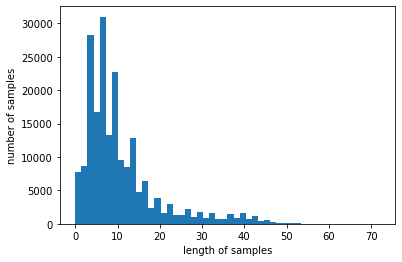

In [37]:
# 리뷰 길이 분포 확인
print('리뷰의 최대 길이 :',max(len(l) for l in tokenized_data))
print('리뷰의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(s) for s in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [39]:
model = Word2Vec(sentences = tokenized_data,vector_size=100,window=5,min_count=5,workers=4, sg=0)

In [40]:
model.wv.vectors.shape

(16477, 100)

In [41]:
print(model.wv.most_similar("최민식"))

[('서영희', 0.8548799157142639), ('한석규', 0.8537030816078186), ('안성기', 0.8503559827804565), ('김명민', 0.8318119645118713), ('단역', 0.8202430009841919), ('김수현', 0.8152785301208496), ('채민서', 0.8143865466117859), ('엄정화', 0.8130993247032166), ('박중훈', 0.810040295124054), ('오광록', 0.807460367679596)]
